# Toyota Used Car Exploratory Data Analysis

The aim of this notebook is to perform exploratory data analysis on the dataset of used toyota cars.

Exploratory Data Analysis Steps:

1. Reading the data using Pandas DataFrame
2. Checking the data types and looking for missing values
3. Checking the basic statistics of the numerical variables
4. Checking the unique values of the categorical features
5. Visualizing the data using Seaborn and Matplot


### Import required libraries and packages

In [33]:
#For_Data_Analysis
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Read the CSV file using Pandas dataframe

In [34]:
df = pd.read_csv('toyota.csv')

print (type(df))
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,50.4,1.3


### Check for data types and any missing values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


In [36]:
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

(6738, 8)
number of rows =  6738
number of columns =  8


### Finding out the number of unique values for each 'year'

In [37]:
print(df["year"].unique())
print(type (df["year"].unique()))
print(len (df["year"].unique()))
print(df["year"].value_counts())

[2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998]
<class 'numpy.ndarray'>
23
2017    2019
2019    1286
2018    1015
2016     997
2015     525
2014     352
2013     204
2020     128
2012      42
2011      40
2009      29
2007      20
2008      19
2010      18
2005      12
2006      11
2004       7
2003       6
2002       4
2001       1
1999       1
2000       1
1998       1
Name: year, dtype: int64


### Finding out the number of unique values for each 'model'

In [38]:
print(df["model"].value_counts())

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64


### Finding out the number of unique values for each 'Transmission' type

In [39]:
print(df["transmission"].value_counts())

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64


### Finding out the number of unique values for each 'fuelType'

In [40]:
print(df["fuelType"].value_counts())

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64


### Pie Chart (Transmission)

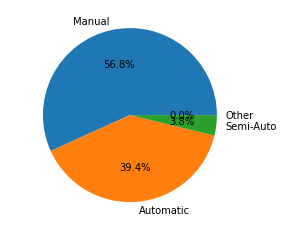

In [41]:
df["transmission"].value_counts().plot(kind="pie" , autopct='%1.1f%%', startangle=0)
plt.ylabel(" ")
plt.show()

### Pie Chart (fuelType)

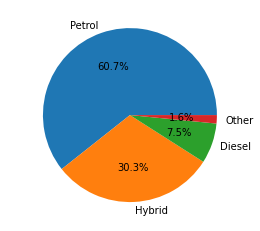

In [42]:
df["fuelType"].value_counts().plot(kind="pie" , autopct='%1.1f%%', startangle=0)
plt.ylabel(" ")
plt.show()

Finding out the number of unique values for 'fuelType'

In [43]:
print(df["fuelType"].value_counts())
print(type(df["fuelType"].value_counts()))

df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
display(df_fuelType.head())
print(df_fuelType.index)
print(df_fuelType.columns)

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Petrol,4087
Hybrid,2043
Diesel,503
Other,105


Index(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype='object')
Index(['fuelType'], dtype='object')


### Calculating the '% of cars' column (1)

In [44]:
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType","fuelType":"no_of_cars"})

#df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])
df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,4087,60.66
1,Hybrid,2043,30.32
2,Diesel,503,7.47
3,Other,105,1.56


### Bar Plot (fuelType)

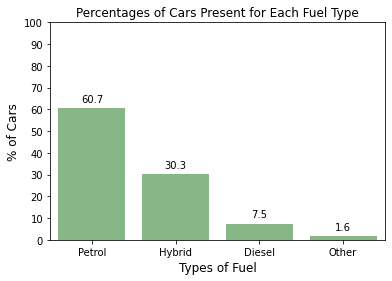

In [45]:
barplot_fuelType = sns.barplot(x="fuelType", y="% of cars", data=df_fuelType, color="green", alpha=0.5)

for p in barplot_fuelType.patches:
    barplot_fuelType.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel("Types of Fuel", size=12)
plt.ylabel("% of Cars", size=12)
plt.title("Percentages of Cars Present for Each Fuel Type")
plt.yticks(np.arange(0,101,10))

plt.show()

### Calculating the '% of cars' column (2)

In [46]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission","transmission":"no_of_cars"})

##df_fuelType["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])
df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

display(df_transmission)

,transmission,no_of_cars,% of cars
0,Manual,3826,56.78
1,Automatic,2657,39.43
2,Semi-Auto,254,3.77
3,Other,1,0.01


### Bar Plot (Transmission)

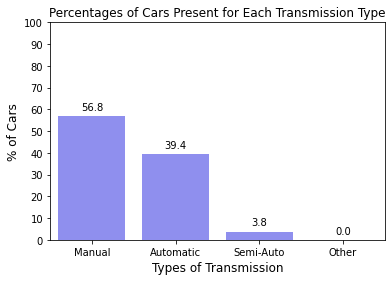

In [47]:
barplot_transmission = sns.barplot(x="transmission", y="% of cars", data=df_transmission, color="blue", alpha=0.5)

for p in barplot_transmission.patches:
    barplot_transmission.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel("Types of Transmission", size=12)
plt.ylabel("% of Cars", size=12)
plt.title("Percentages of Cars Present for Each Transmission Type")
plt.yticks(np.arange(0,101,10))

plt.show()

#### Comment:
    
In this notebook, two pie charts and bar plots were visualized using the dataset of used Toyota cars. The categorical
variables used were 'Transmission' and 'fuelType.' In both cases, barplot turned out to be a better tool for representing
the aforementioned categorical variable when compared to the pie charts for the following reasons:
    
Firstly, in most cases, a pie chart is only effective when there are two, at most three variables to be represented.
As it can be seen from above, for both 'Transmission' and 'fuelType' columns, there were four separate variables,
making the use of the pie-chart somewhat ineffective. Having said that, it can be adjudged that the pie chart for the
'fuelType' column is superior to its 'transmission' column counterpart. This is because the latter had a type (other)
that had a value corresponding to 0.01% which consequently was too small for the pie chart to depict.

On the other hand, bar plots for both categorical variables were far more legible and comprehensive. However, even 
here, the 'other' type in the bar plot for 'transmission' was too miniscule to be visible. 


### End of Homework 2